In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [13]:
train_data = pd.read_csv('train_dataset_clean.csv')

In [14]:
train_data.describe()

WELLNUM         DEPTH           DTC          DTS           DEN  \
count  42309.000000  42309.000000  19314.000000  7198.000000  42309.000000   
mean       4.985866  12245.593757     76.710857   131.021627      2.411064   
std        2.268441   1604.293688     12.312749    14.551402      0.160632   
min        0.000000   8494.000000      1.025100    74.822400      1.626600   
25%        4.000000  11191.600000     68.909410   123.151225      2.264400   
50%        6.000000  11910.110000     74.998850   131.898800      2.419800   
75%        6.000000  13375.330000     83.715325   138.538250      2.544000   
max        8.000000  15566.930000    123.253500   193.840200      3.089600   

                 GR           NEU           PEF          RDEP          RMED  \
count  42309.000000  42306.000000  40429.000000  42075.000000  42309.000000   
mean      39.888234      0.181612      5.185693      0.602216      0.710817   
std       24.822777      0.066775      1.715554      0.645071      0.843949   
min        4.588597     -0.003400     -0.013100     -0.887730     -0.855737   
25%       20.069900      0.144110      4.583000      0.168936      0.185060   
50%       35.799400      0.176400      5.414100      0.444872      0.522079   
75%       52.007100      0.215500      6.096800      0.960457      1.050073   
max      304.333700      0.862567     13.356600      4.904536      4.794424   

               PHIF            SW           VSH  
count  42309.000000  42309.000000  42309.000000  
mean       0.141736      0.667124      0.275485  
std        0.081144      0.354821      0.206619  
min        0.000000      0.013000     -0.248000  
25%        0.068437      0.297700      0.113500  
50%        0.141000      0.808000      0.232600  
75%        0.217000      1.000000      0.360400  
max        0.403294      1.000000      2.460104

In [22]:
#Convert logarithm values of resistivity logs back to normal value
train_data["RDEP"]=10**(train_data["RDEP"])
train_data["RMED"]=10**(train_data["RMED"])
train_data.describe()

WELLNUM         DEPTH           DTC          DTS           DEN  \
count  42309.000000  42309.000000  19314.000000  7198.000000  42309.000000   
mean       4.985866  12245.593757     76.710857   131.021627      2.411064   
std        2.268441   1604.293688     12.312749    14.551402      0.160632   
min        0.000000   8494.000000      1.025100    74.822400      1.626600   
25%        4.000000  11191.600000     68.909410   123.151225      2.264400   
50%        6.000000  11910.110000     74.998850   131.898800      2.419800   
75%        6.000000  13375.330000     83.715325   138.538250      2.544000   
max        8.000000  15566.930000    123.253500   193.840200      3.089600   

                 GR           NEU           PEF          RDEP          RMED  \
count  42309.000000  42306.000000  40429.000000  42075.000000  42309.000000   
mean      39.888234      0.181612      5.185693     25.199747   1029.768280   
std       24.822777      0.066775      1.715554    440.389867   7800.685663   
min        4.588597     -0.003400     -0.013100      0.129500      0.139400   
25%       20.069900      0.144110      4.583000      1.475490      1.531300   
50%       35.799400      0.176400      5.414100      2.785300      3.327200   
75%       52.007100      0.215500      6.096800      9.129700     11.222060   
max      304.333700      0.862567     13.356600  80266.800000  62290.800000   

               PHIF            SW           VSH  
count  42309.000000  42309.000000  42309.000000  
mean       0.141736      0.667124      0.275485  
std        0.081144      0.354821      0.206619  
min        0.000000      0.013000     -0.248000  
25%        0.068437      0.297700      0.113500  
50%        0.141000      0.808000      0.232600  
75%        0.217000      1.000000      0.360400  
max        0.403294      1.000000      2.460104

In [23]:
train_data['WELLNUM'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [24]:
grouped = train_data.groupby('WELLNUM')

In [25]:
grouped.head()

WELLNUM         DEPTH       DTC       DTS       DEN        GR  \
0            0  14121.660105   89.6461       NaN  2.577700   88.8573   
1            0  14122.160105   96.0152       NaN  2.474800  120.8949   
2            0  14122.660105  104.0457       NaN  2.333800  153.5195   
3            0  14123.160105  113.5010       NaN  2.235800  182.8531   
4            0  14123.660105  117.7817       NaN  2.227800  256.1960   
1880         1  10891.400000   68.4532       NaN  2.632000  129.3430   
1881         1  10891.730000   68.2104       NaN  2.642600   94.6083   
1882         1  10892.060000   67.8065       NaN  2.637700   72.5098   
1883         1  10892.390000   67.1673       NaN  2.618100   58.2253   
1884         1  10892.720000   66.6096       NaN  2.587300   52.7181   
4752         2  11251.310000   89.9910  186.7906  2.447700   75.1668   
4753         2  11251.640000   90.1315  185.7127  2.452900   71.3828   
4754         2  11251.970000   90.2608  184.6462  2.464800   65.6385   
4755         2  11252.300000   90.3900  183.5797  2.488100   58.8981   
4756         2  11252.630000   90.4286  182.9750  2.525000   53.5140   
7033         3  10595.140000   87.0473       NaN  2.514400   99.5076   
7034         3  10595.470000   86.5761       NaN  2.526600   97.7818   
7035         3  10595.800000   86.3109       NaN  2.542700   97.9410   
7036         3  10596.130000   86.1098       NaN  2.558200   97.7780   
7037         3  10596.460000   85.9788       NaN  2.567800   96.7450   
9138         4  10574.150000       NaN       NaN  2.511300  105.9000   
9139         4  10574.470000       NaN       NaN  2.499200  100.3700   
9140         4  10574.800000       NaN       NaN  2.488500   95.9118   
9141         4  10575.130000       NaN       NaN  2.483600   97.0329   
9142         4  10575.460000       NaN       NaN  2.483500   94.3718   
17560        5  11729.000000   88.0416  164.4883  2.515100   94.3059   
17561        5  11729.330000   87.9413  163.4838  2.514300   90.8153   
17562        5  11729.660000   87.7235  162.3372  2.510500   90.6820   
17563        5  11729.990000   87.3798  161.0310  2.507000   92.6109   
17564        5  11730.320000   87.7178  159.8620  2.506600   94.9269   
19093        6  10996.060000       NaN       NaN  2.569500  104.9330   
19094        6  10996.390000       NaN       NaN  2.563500  107.5480   
19095        6  10996.720000       NaN       NaN  2.559300  106.3580   
19096        6  10997.050000       NaN       NaN  2.556400  106.9340   
19097        6  10997.380000       NaN       NaN  2.553500  105.7730   
33026        7  14221.460000   85.6265  141.2509  2.461700  101.9590   
33027        7  14221.790000   84.7197  141.3882  2.479700   98.4098   
33028        7  14222.110000   83.7354  141.1619  2.497300   96.7457   
33029        7  14222.440000   82.6788  140.3676  2.509700   96.1325   
33030        7  14222.770000   81.4570  139.5091  2.514000   95.0044   
35043        8   8494.000000  102.1521       NaN  2.344262  115.9796   
35044        8   8494.500000  102.1521       NaN  2.335518  115.0715   
35045        8   8495.000000  102.2286       NaN  2.328541  115.7894   
35046        8   8495.500000  102.3289       NaN  2.324563  112.2009   
35047        8   8496.000000  101.9399       NaN  2.330708  108.6439   

            NEU      PEF      RDEP      RMED      PHIF      SW       VSH  
0      0.277790      NaN  2.631000  2.492700  0.000000  1.0000  0.751631  
1      0.294806      NaN  2.476000  2.468500  0.000000  1.0000  1.032475  
2      0.447361      NaN  2.435900  2.374200  0.000000  1.0000  1.312757  
3      0.579637      NaN  2.406500  2.414200  0.000000  1.0000  1.682292  
4      0.556317      NaN  2.336500  2.407700  0.000000  1.0000  1.924398  
1880   0.109800  7.39060  1.465300  1.307900  0.020000  1.0000  0.744600  
1881   0.105400  7.09660  1.504100  1.482400  0.020000  1.0000  0.758200  
1882   0.105100  6.78060  1.739600  1.959300  0.020000  1.0000  0.547700  
1883   0.104700  6.

In [26]:
# Create empty lists
train_datas_wells = []
wellnames = []

#Split up the data by well
for well, data in grouped:
    train_datas_wells.append(data)
    wellnames.append(well)

In [27]:
for i, well in enumerate(wellnames):
    print(f'Index: {i} - {well}')

Index: 0 - 0
Index: 1 - 1
Index: 2 - 2
Index: 3 - 3
Index: 4 - 4
Index: 5 - 5
Index: 6 - 6
Index: 7 - 7
Index: 8 - 8


In [28]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)
        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
    
    plt.tight_layout()
    plt.show()

In [29]:
curves_to_plot = ['DTC', 'DTS', 'GR', 'NEU', 'RDEP', 'RMED', 'DEN', 'PEF', 'PHIF', 'SW', 'VSH']
logarithmic_curves = ['RDEP', 'RMED']

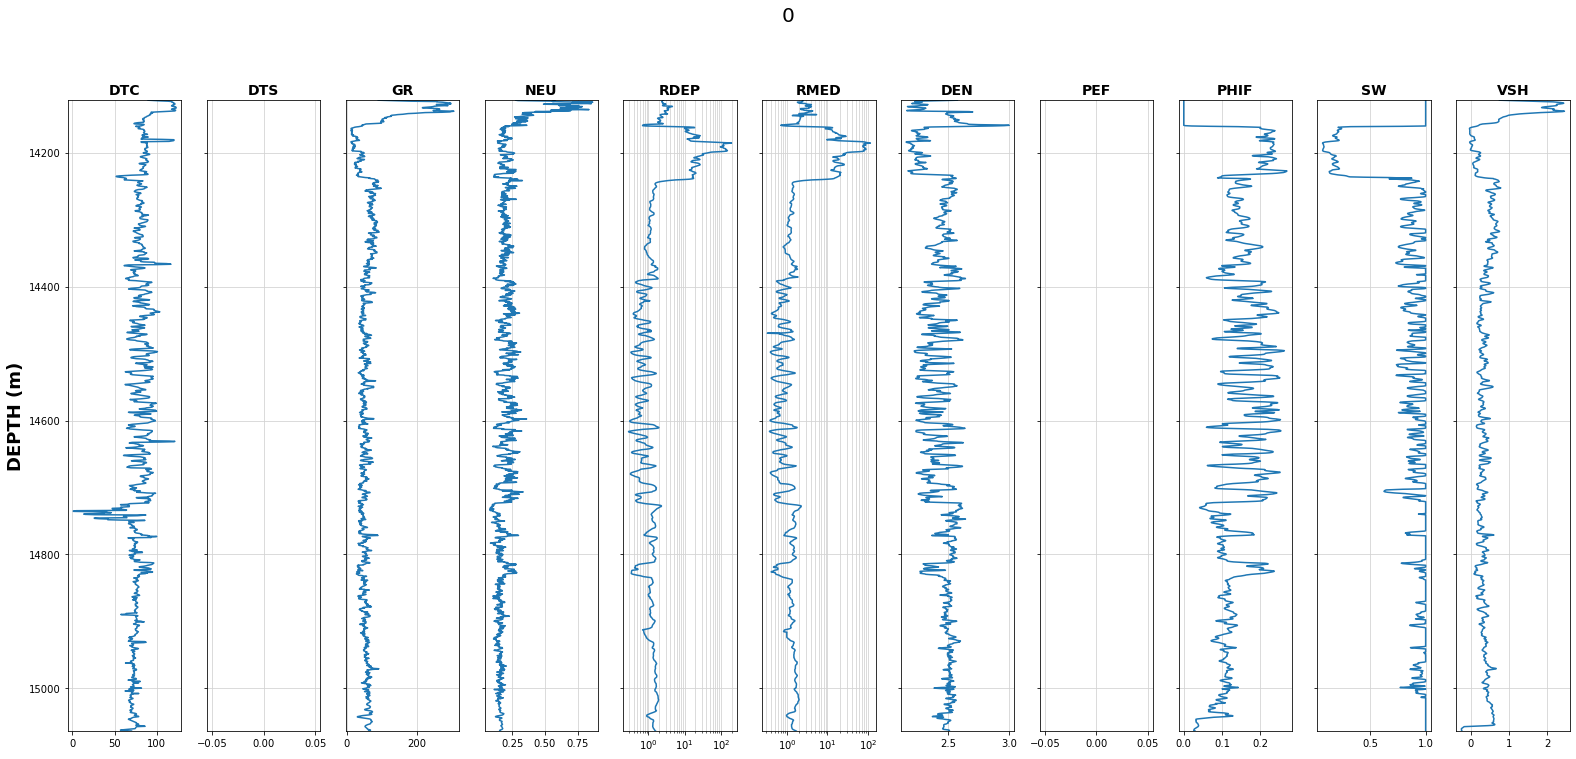

In [31]:
well = 0
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

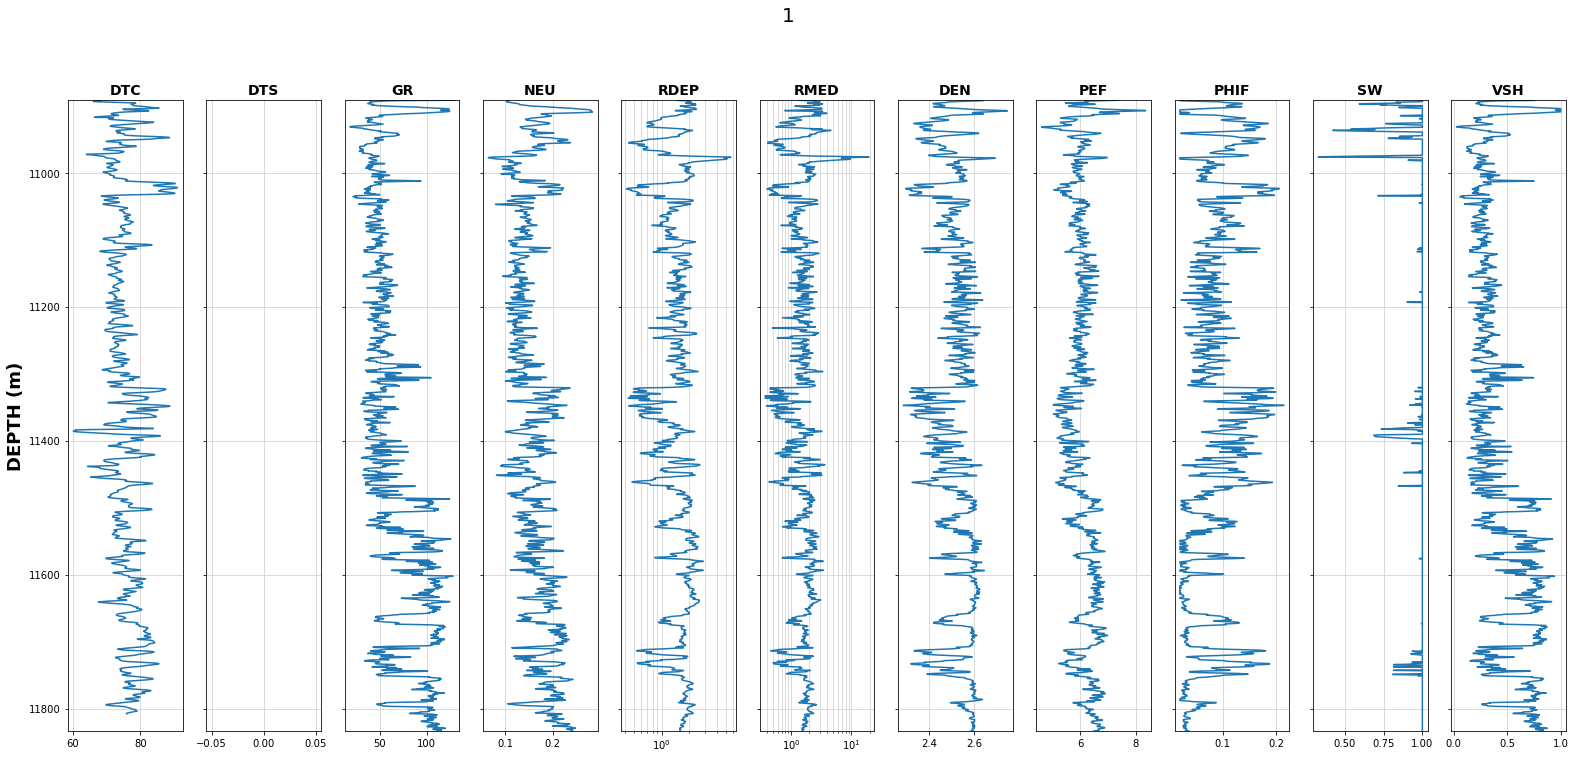

In [32]:
well = 1
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

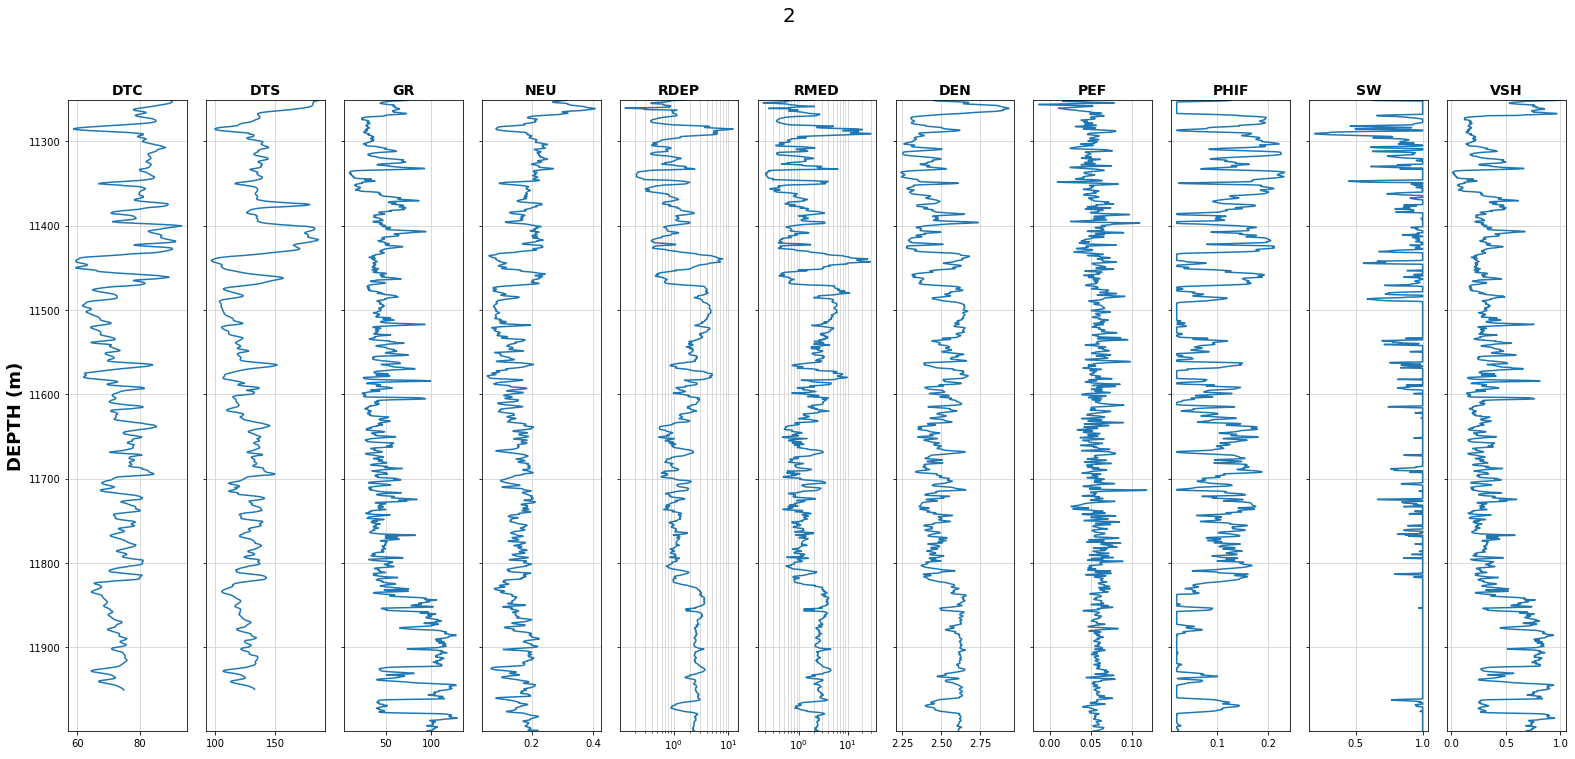

In [33]:
well = 2
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

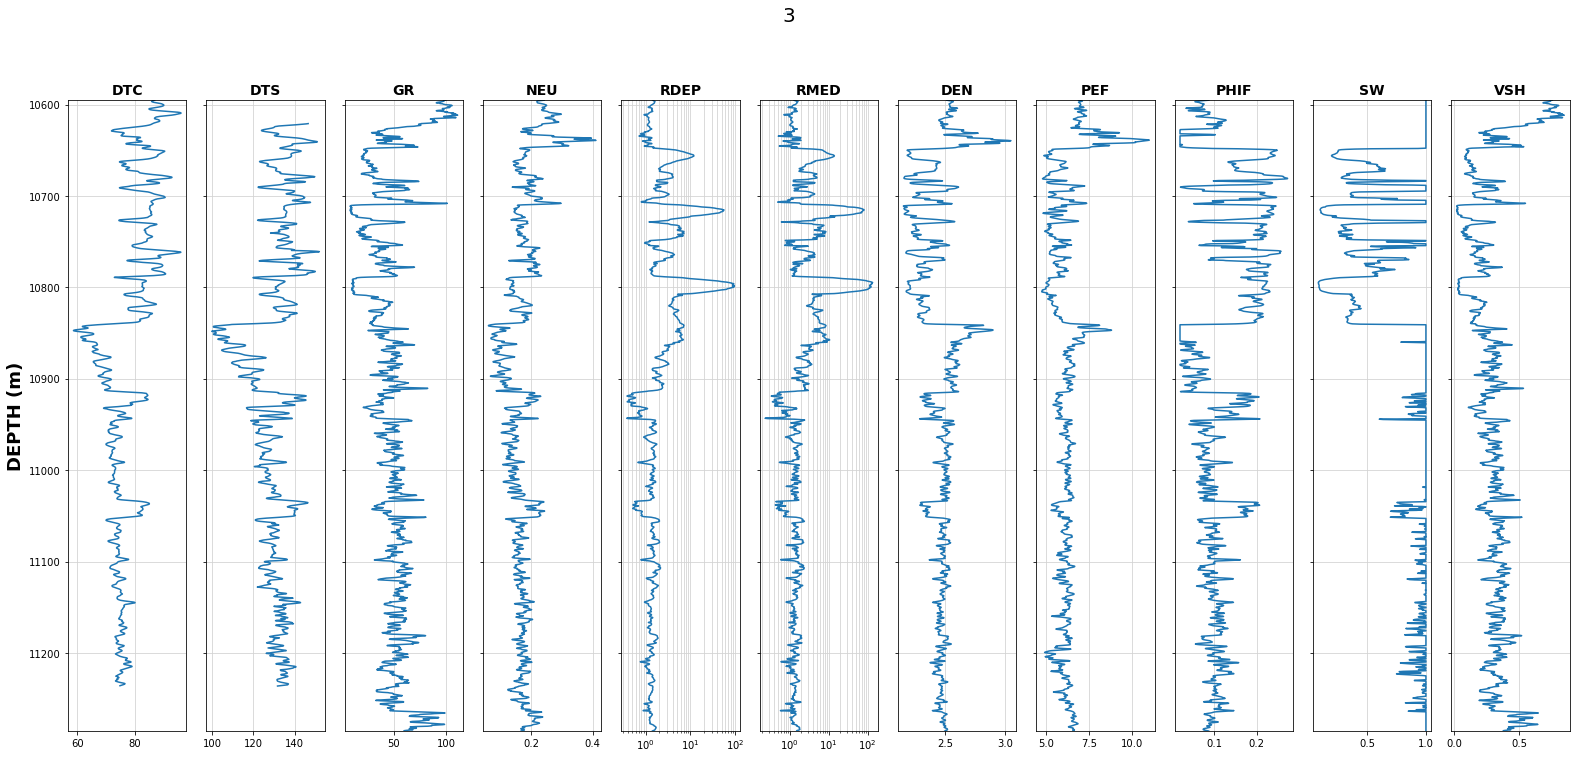

In [34]:
well = 3
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

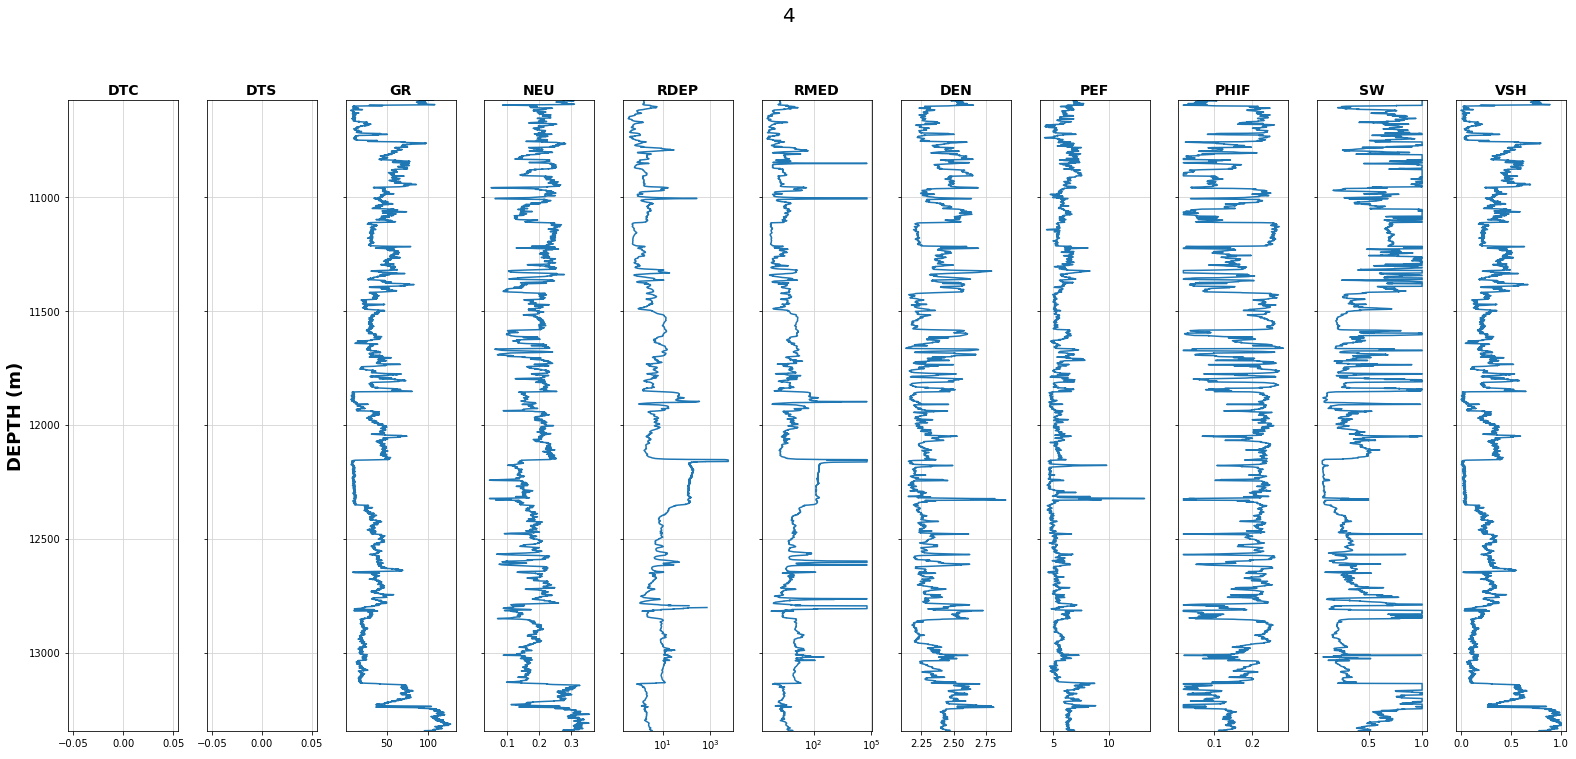

In [35]:
well = 4
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

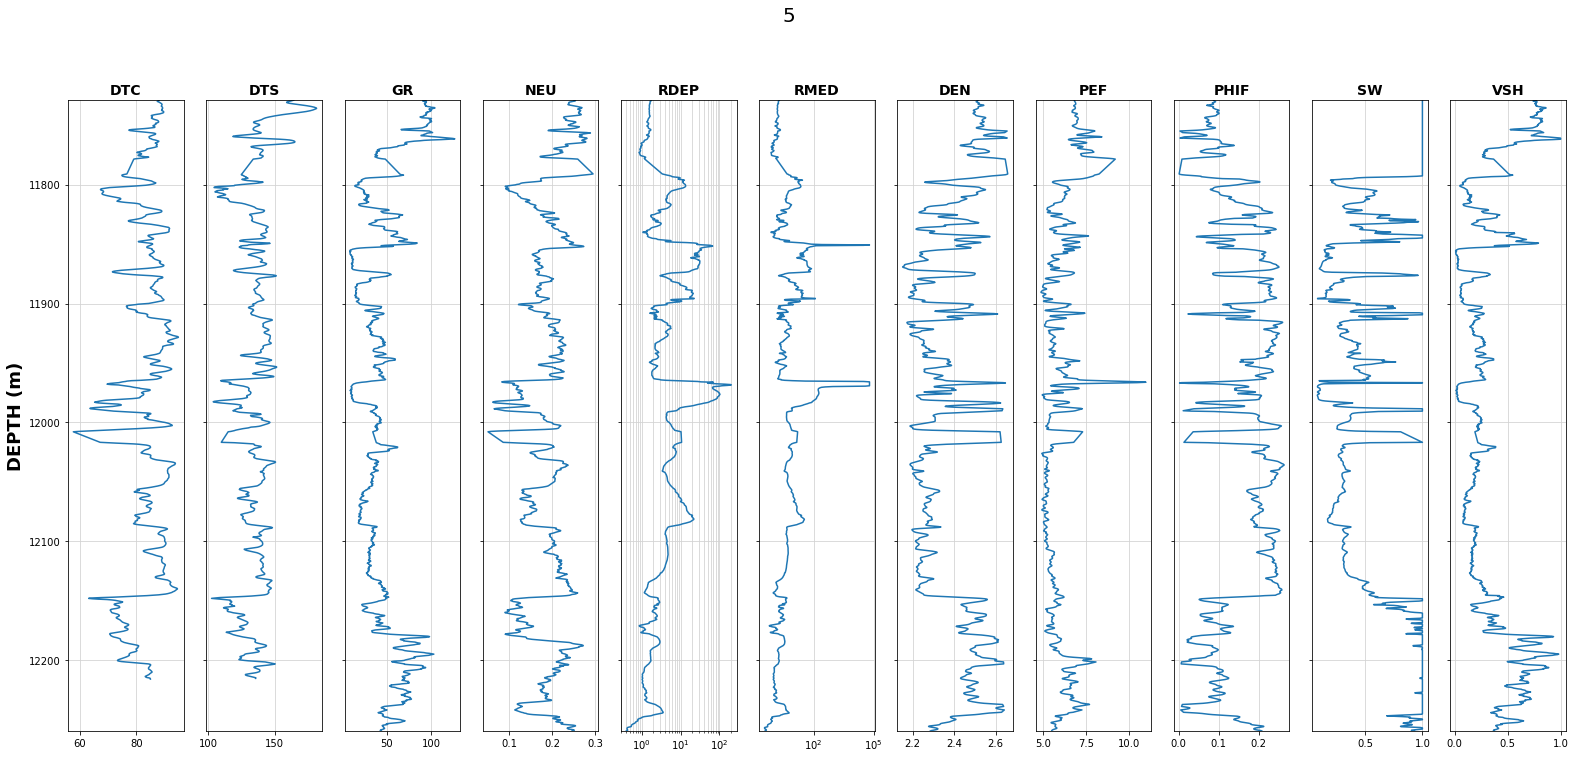

In [36]:
well = 5
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

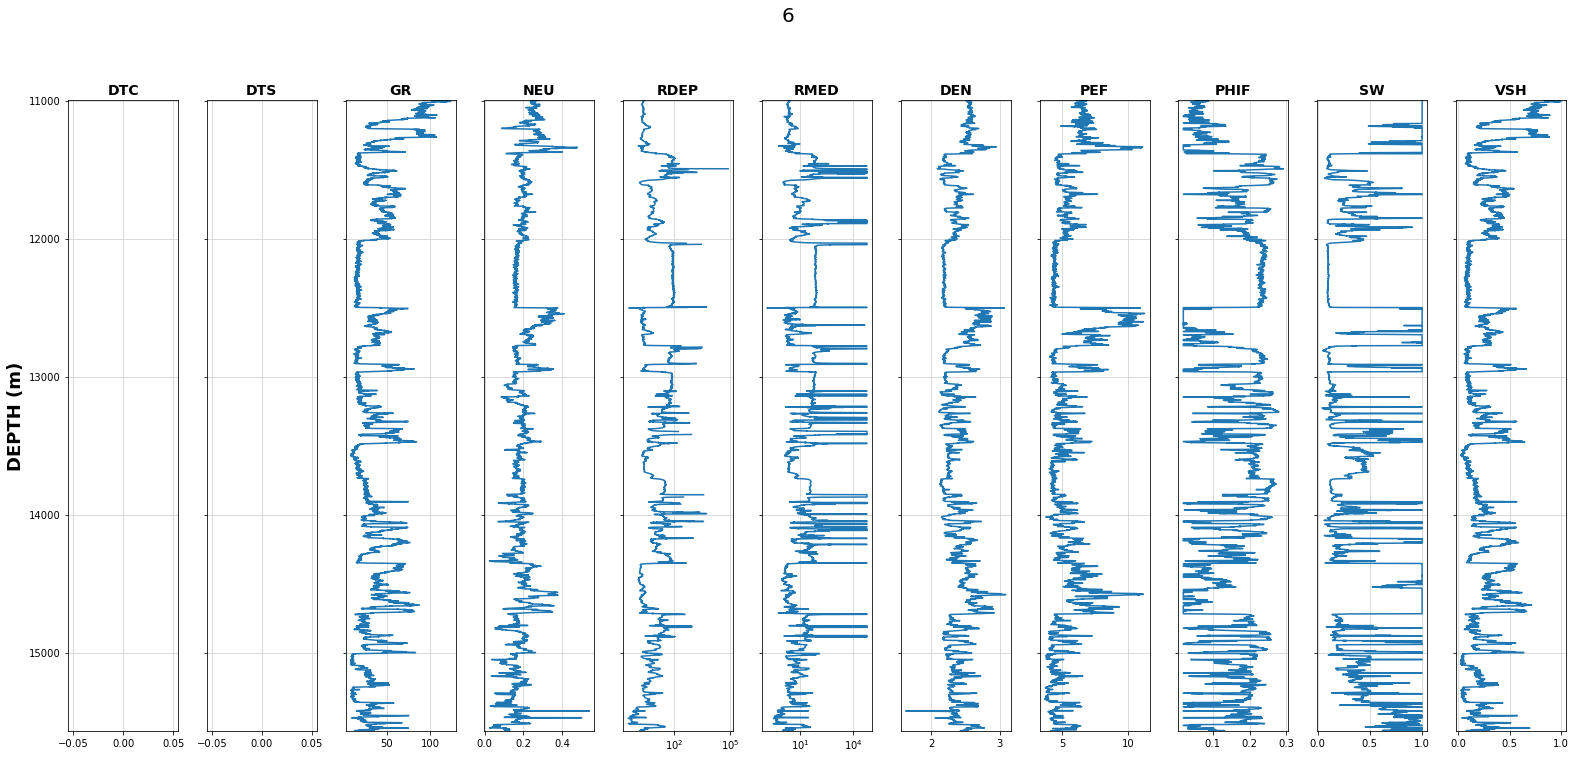

In [37]:
well = 6
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

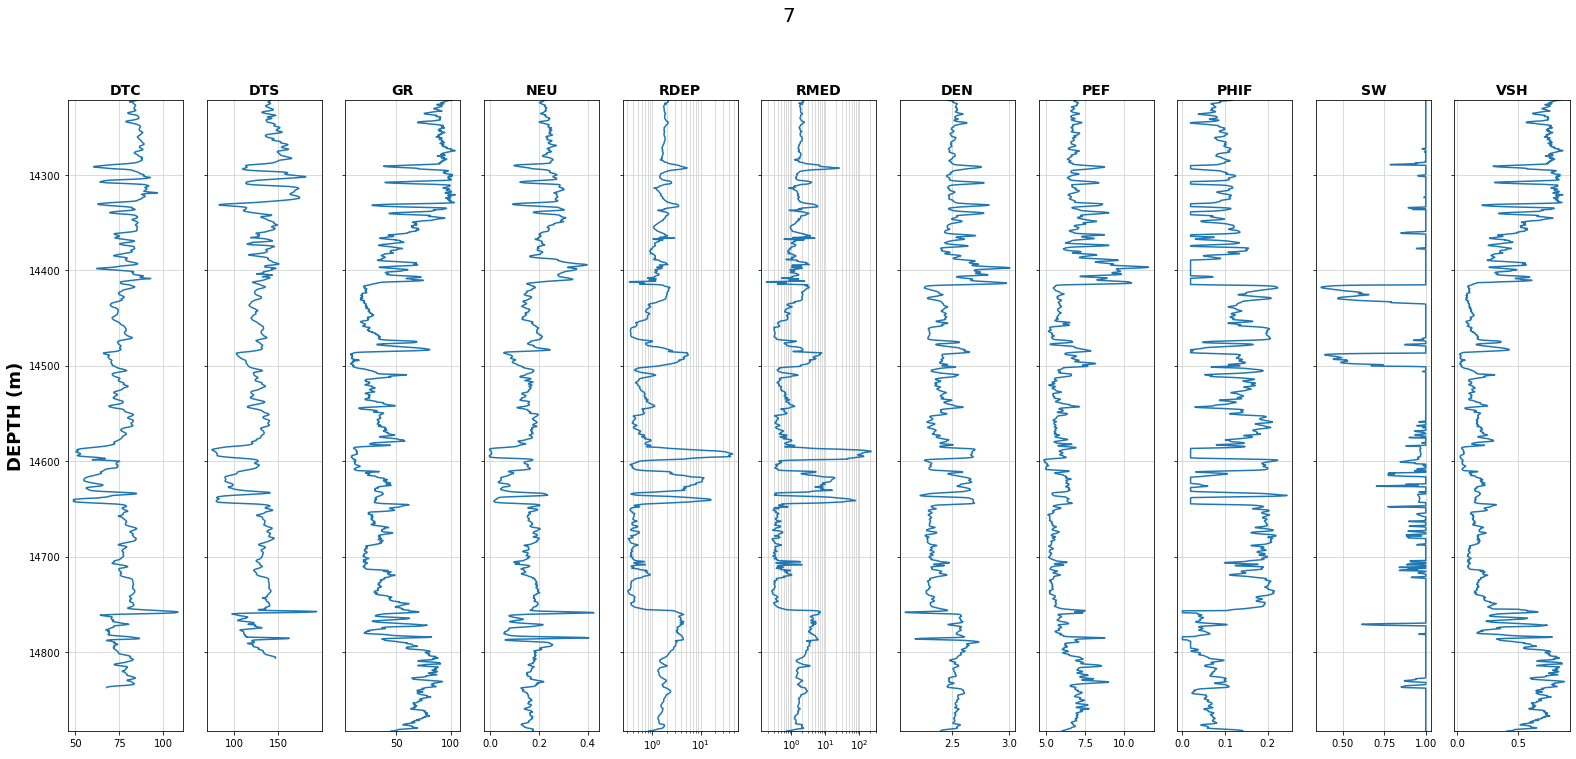

In [38]:
well = 7
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

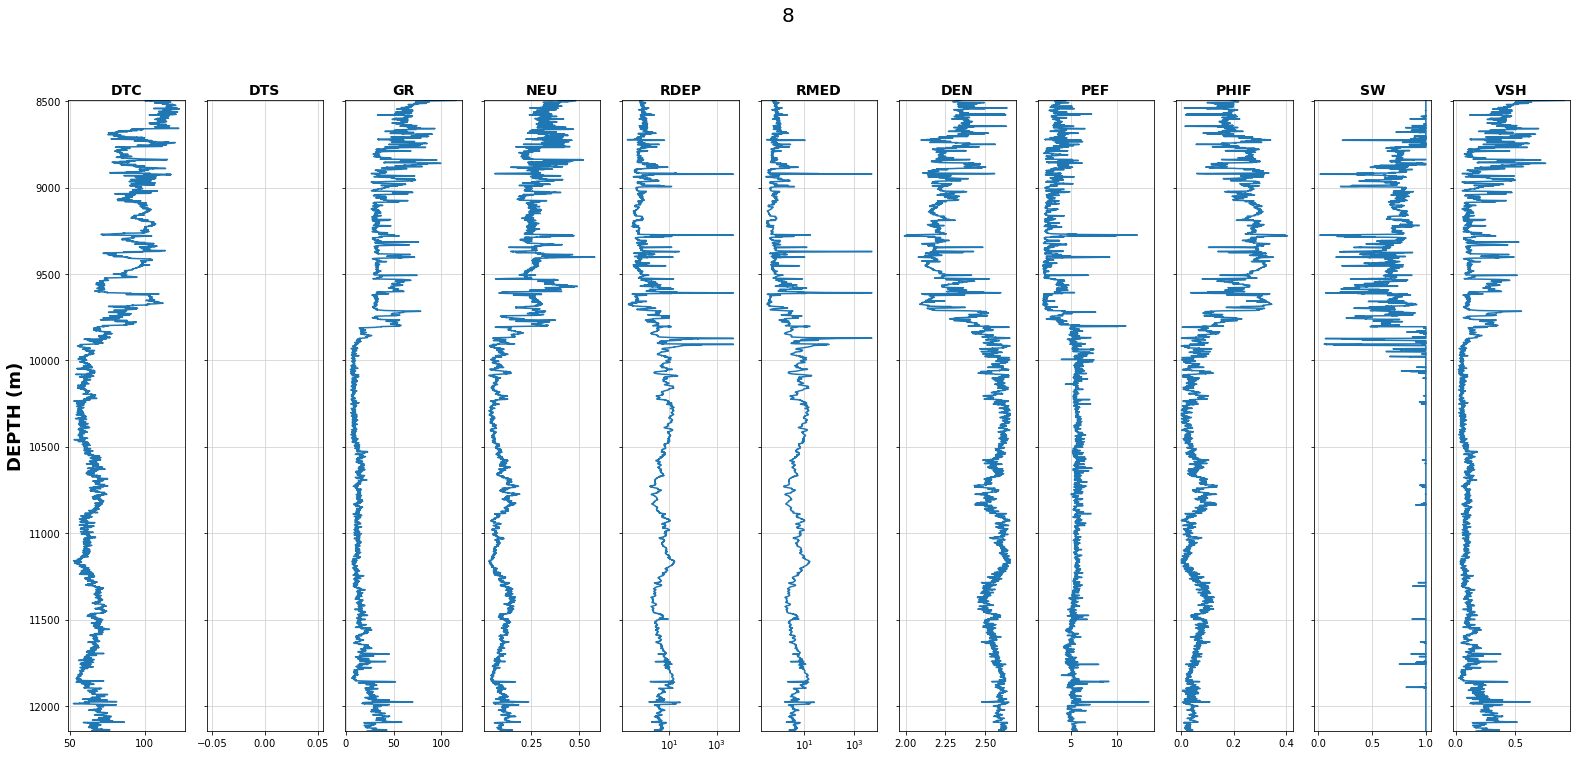

In [39]:
well = 8
create_plot(wellnames[well], train_datas_wells[well], curves_to_plot, train_datas_wells[well]['DEPTH'], logarithmic_curves)

In [41]:
def make_boxplot(welldata, inputs):

    num_inputs = len(inputs)

    fig, axs = plt.subplots(1, num_inputs, figsize=(20,10))

    for i, (ax, curve) in enumerate(zip(axs.flat, inputs), 1):
        sns.boxplot(y=welldata[curve], ax=ax, color='cornflowerblue', showmeans=True,  
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"},
               flierprops={'marker':'o', 
                          'markerfacecolor':'darkgreen',
                          'markeredgecolor':'darkgreen'})
        
        ax.set_title(inputs[i-1])
        ax.set_ylabel('')

    plt.subplots_adjust(hspace=0.15, wspace=1.25)
    plt.show()

In [64]:
well_0=train_data.loc[train_data.WELLNUM==0]
well_0.describe()

WELLNUM         DEPTH          DTC  DTS          DEN           GR  \
count   1880.0   1880.000000  1880.000000  0.0  1880.000000  1880.000000   
mean       0.0  14591.420743    79.685261  NaN     2.438382    57.031396   
std        0.0    271.445186    11.851970  NaN     0.110390    33.222726   
min        0.0  14121.660105     1.025100  NaN     2.158000    11.054300   
25%        0.0  14356.535105    72.908925  NaN     2.351525    43.276550   
50%        0.0  14591.410105    78.358800  NaN     2.467850    51.766000   
75%        0.0  14826.285105    86.222875  NaN     2.519525    62.287350   
max        0.0  15063.660105   123.134500  NaN     3.001300   304.333700   

               NEU  PEF         RDEP         RMED         PHIF           SW  \
count  1880.000000  0.0  1880.000000  1880.000000  1880.000000  1880.000000   
mean      0.199087  NaN     4.343955     3.672391     0.141878     0.878460   
std       0.081285  NaN    16.311322    11.357025     0.059811     0.222048   
min       0.079777  NaN     0.283100     0.322000     0.000000     0.075468   
25%       0.155209  NaN     0.736125     0.785725     0.105880     0.864177   
50%       0.182478  NaN     1.166850     1.211300     0.132582     0.964610   
75%       0.224442  NaN     1.542850     1.541600     0.192111     1.000000   
max       0.862567  NaN   198.537100   115.635000     0.269308     1.000000   

               VSH  
count  1880.000000  
mean      0.386786  
std       0.305142  
min      -0.248000  
25%       0.244369  
50%       0.339936  
75%       0.454783  
max       2.460104

['DEPTH', 'DTC', 'DTS', 'DEN', 'GR', 'NEU', 'PEF', 'RDEP', 'RMED', 'PHIF', 'SW', 'VSH']
Total Number of Samples: 42309


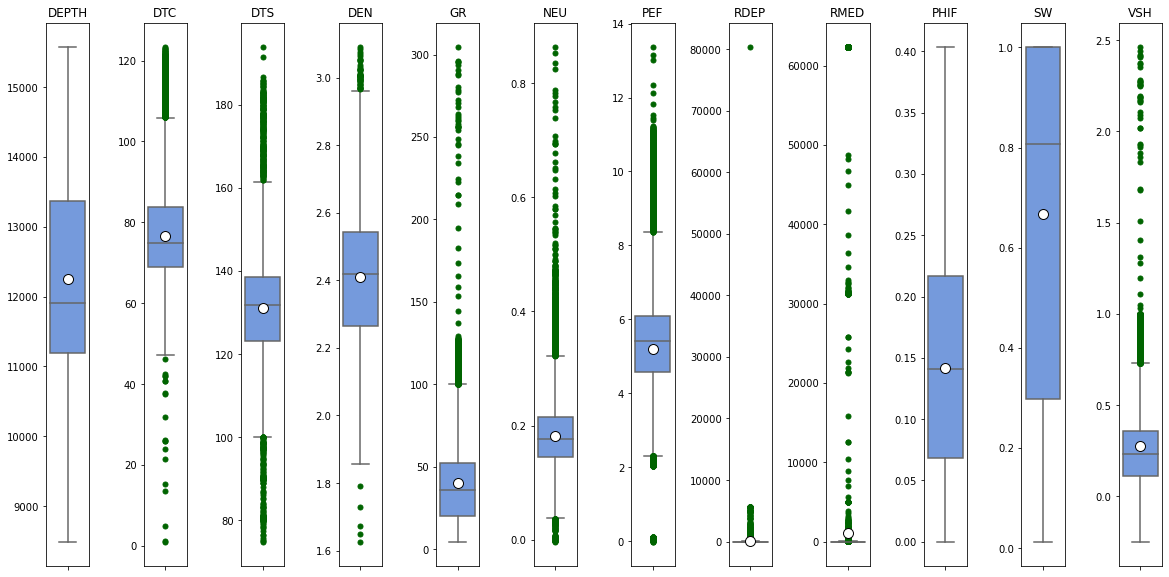

In [66]:
inputs = list(train_data.columns)
inputs.pop(0) # remove the well name from the columns list
print(inputs)
print(f'Total Number of Samples: {len(train_data)}')
make_boxplot(train_data, inputs)

In [67]:
import matplotlib
def make_xplot(welldata, xvar, yvar,  color, rows=1, cols=1, xscale=[0,1], yscale=[0,1], vmin=0, vmax=100):
    fig, axs = plt.subplots(rows, cols, figsize=(25,5))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])
    
    for (WELLNUM, welldata), ax in zip(grouped, axs.flat):
        sc = ax.scatter(x=xvar, y=yvar, data=welldata, s=5, c=color, vmin=vmin, vmax=vmax, cmap=cmap)
#         sns.scatterplot(x=xvar, y=yvar, data=welldata, hue=color, ax=ax, legend=False, palette="viridis")

        ax.set_ylim(yscale[0], yscale[1])
        ax.set_xlim(xscale[0], xscale[1])
        ax.set_ylabel(yvar)
        ax.set_xlabel(xvar)
        ax.set_title(WELLNUM)
        
        fig.colorbar(sc, ax=ax)
    plt.tight_layout()
    plt.show()

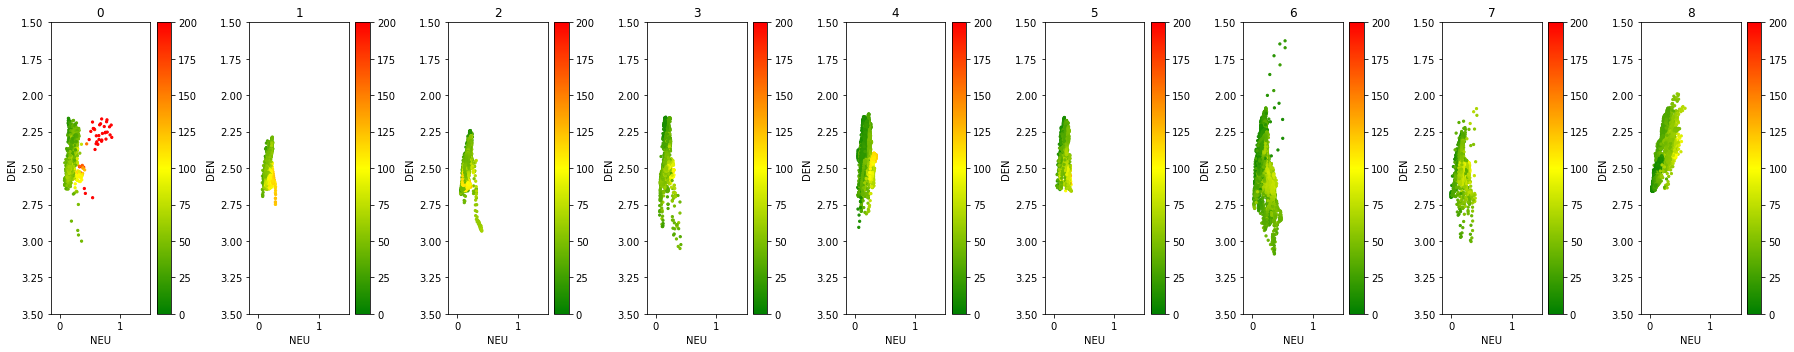

In [69]:
grouped = train_data.groupby('WELLNUM')
make_xplot(grouped, 'NEU', 'DEN', 'GR', 1, 9, [-0.15, 1.5], [3.5,1.5], 0, 200)

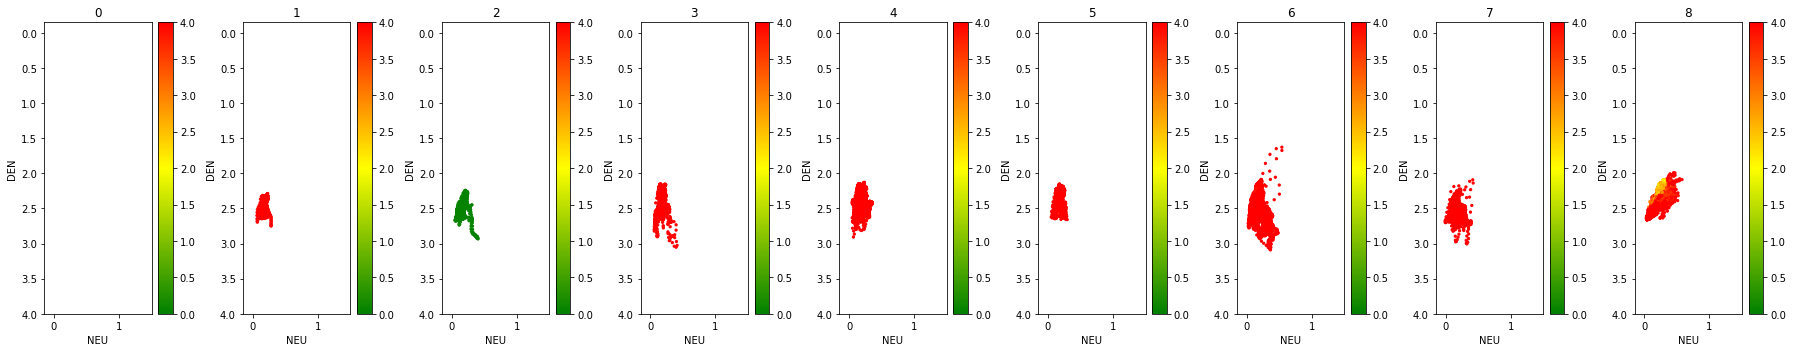

In [60]:
grouped = train_data.groupby('WELLNUM')
make_xplot(grouped, 'NEU', 'DEN', 'PEF', 1, 9, [-0.15, 1.5], [4,-0.15], 0, 4)

In [70]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Create a copy of the dataframe so that the original remanins untouched and extract the required curves
anomaly_df = train_data[['WELLNUM', 'DEPTH', 'GR', 'NEU', 'DEN', 'RMED', 'RDEP', 'DTC', 'PEF', 'DTS', 'PHIF', 'SW', 'VSH']].copy()

# Drop any null values. This method drops the entire row of data if one of the cells in that row
# contains a null (NaN) value
anomaly_df.dropna(inplace=True)

# Define the inputs for the anomaly detection
anomaly_inputs = ['NEU', 'DEN', 'GR', 'RDEP', 'PEF', 'DTC']

# Setup the models, each will have a contamination (outlier) fraction of 0.1
# The random_state is set to allow repeatable results for the Isolation Forest. 
#This can be omitted if required.
model_IF = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), max_features=1.0, random_state=42)
model_SVM = OneClassSVM(nu=0.10)
model_lof = LocalOutlierFactor(contamination=0.1, novelty=True)

models = {'IF':model_IF, 
        'SVM': model_SVM,
        'LOF': model_lof}

for name, model in models.items():
    print(f'Fitting: {name}')
    model.fit(anomaly_df[anomaly_inputs])
    anomaly_df[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df[anomaly_inputs])
    anomaly_df[f'{name}_anomaly'] = model.predict(anomaly_df[anomaly_inputs])

print('Model Fitting Complete')
anomaly_df.head(5)

Fitting: IF


C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting: SVM
Fitting: LOF
Model Fitting Complete


C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\djnav\anaconda3\envs\petro\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


WELLNUM     DEPTH       GR     NEU     DEN    RMED    RDEP      DTC  \
4752        2  11251.31  75.1668  0.3147  2.4477  1.9640  1.5882  89.9910   
4753        2  11251.64  71.3828  0.3038  2.4529  0.8145  0.8997  90.1315   
4754        2  11251.97  65.6385  0.2948  2.4648  0.5584  0.8494  90.2608   
4755        2  11252.30  58.8981  0.2886  2.4881  0.5147  0.8659  90.3900   
4756        2  11252.63  53.5140  0.2839  2.5250  0.5328  0.8017  90.4286   

         PEF       DTS    PHIF      SW     VSH  IF_anomaly_scores  IF_anomaly  \
4752  0.0490  186.7906  0.1279  0.6187  1.0000          -0.057137          -1   
4753  0.0409  185.7127  0.1248  0.6446  0.9452          -0.044204          -1   
4754  0.0300  184.6462  0.1176  0.7973  0.8582          -0.049442          -1   
4755  0.0201  183.5797  0.1036  1.0000  0.7560          -0.044485          -1   
4756  0.0158  182.9750  0.0813  1.0000  0.6745          -0.036742          -1   

      SVM_anomaly_scores  SVM_anomaly  LOF_anomaly_scores  LOF_anomaly  
4752           22.506386            1           -0.692655           -1  
4753           23.718445            1           -0.442086           -1  
4754           25.524663            1            0.081432            1  
4755           26.015029            1            0.061103            1  
4756           25.068811            1            0.162749            1

Outlier Method: IF
Number of anomalous values 720
Number of non anomalous values  6477
Total Number of Values: 7197
Outlier Method: SVM
Number of anomalous values 719
Number of non anomalous values  6478
Total Number of Values: 7197
Outlier Method: LOF
Number of anomalous values 657
Number of non anomalous values  6540
Total Number of Values: 7197


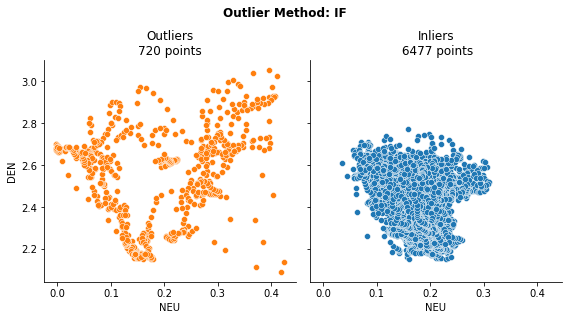

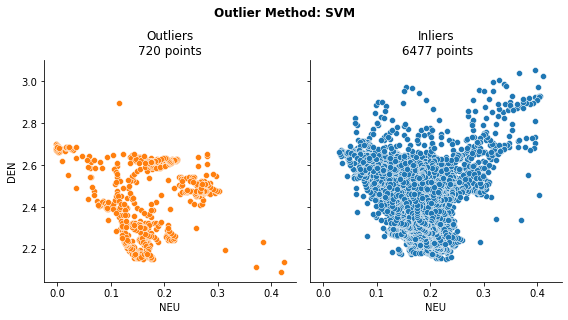

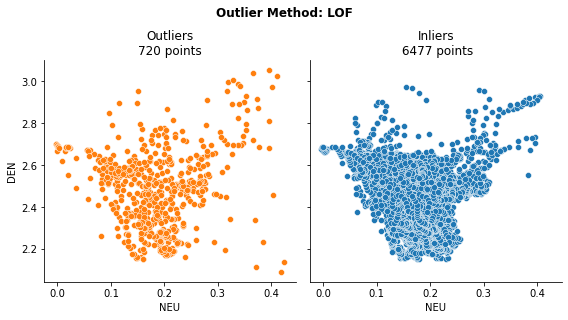

In [71]:
#We can now check the performance of each of the models using density-neturon crossplots. 
#This is achieved using Seaborn's FacetGrid and mapping a scatter plot to it.
for name in models.keys():
    print(f'Outlier Method: {name}')
    method = f'{name}_anomaly'
    print(f"Number of anomalous values {len(anomaly_df[anomaly_df[method]==-1])}")
    print(f"Number of non anomalous values  {len(anomaly_df[anomaly_df[method]== 1])}")
    print(f'Total Number of Values: {len(anomaly_df)}')

    g = sns.FacetGrid(anomaly_df, col=method, height=4, hue=method, hue_order=[1,-1])
    g.map(sns.scatterplot, 'NEU', 'DEN')
    g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold')

    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(anomaly_df[anomaly_df['IF_anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(anomaly_df[anomaly_df['IF_anomaly']==  1])} points")

plt.show()

Outlier Method: IF
Number of anomalous values 720
Number of non anomalous values  6477
Total Number of Values: 7197
Outlier Method: SVM
Number of anomalous values 719
Number of non anomalous values  6478
Total Number of Values: 7197
Outlier Method: LOF
Number of anomalous values 657
Number of non anomalous values  6540
Total Number of Values: 7197


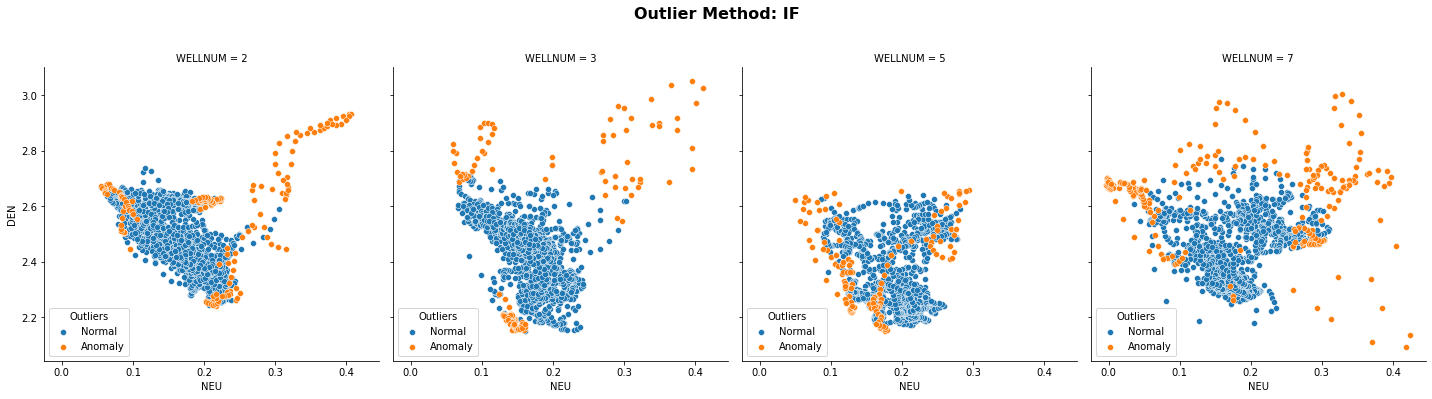

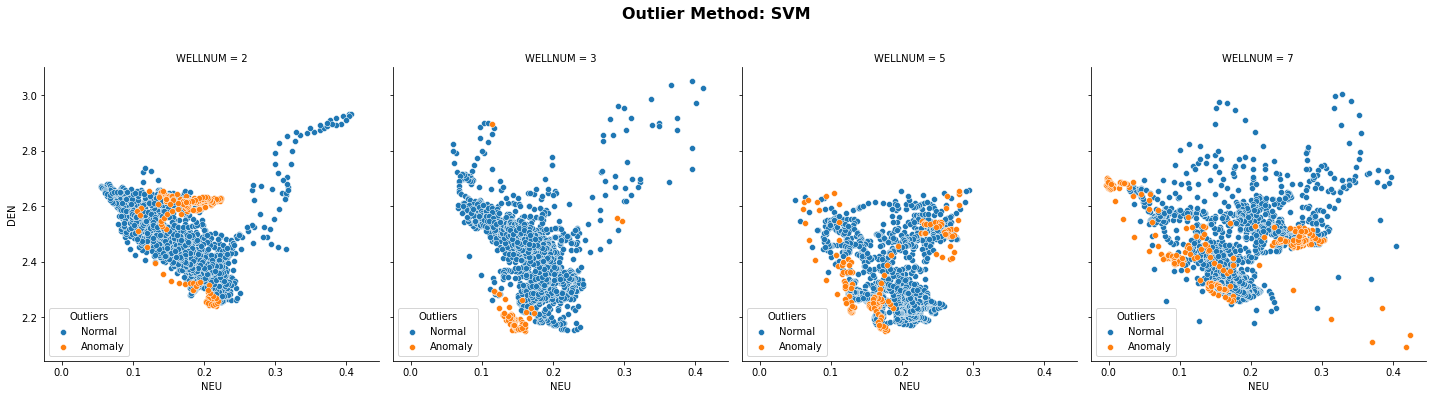

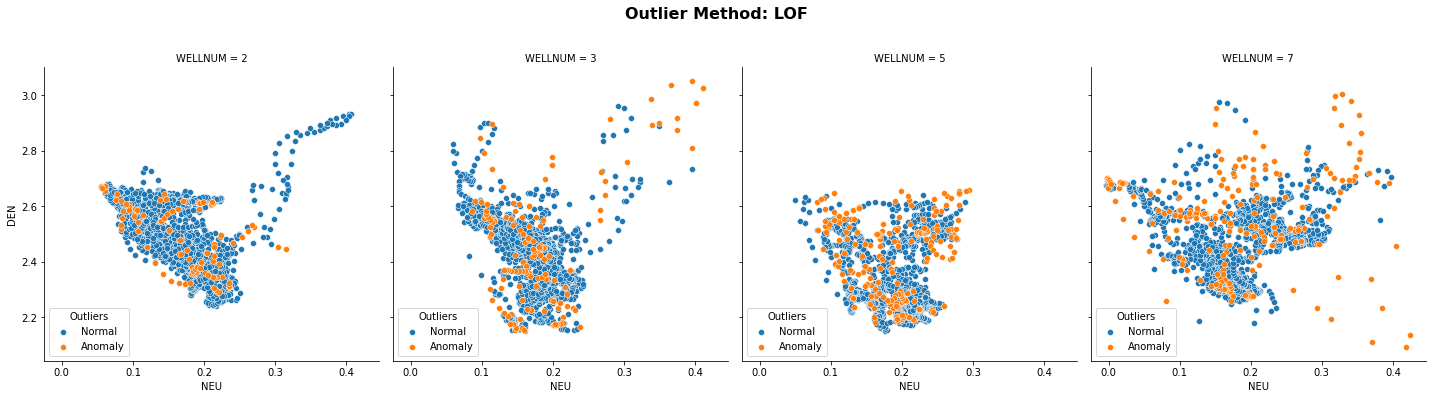

In [72]:
#We can look at the data in more detail for each of the well for each method.
for name in models.keys():
    print(f'Outlier Method: {name}')
    method = f'{name}_anomaly'
    print(f"Number of anomalous values {len(anomaly_df[anomaly_df[method]==-1])}")
    print(f"Number of non anomalous values  {len(anomaly_df[anomaly_df[method]== 1])}")
    print(f'Total Number of Values: {len(anomaly_df)}')

    g = sns.FacetGrid(anomaly_df, col='WELLNUM', hue=method, height=5, hue_order=[1,-1])
    g.map(sns.scatterplot, 'NEU', 'DEN')
    
    g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold', fontsize=16)

    axes = g.axes.flatten()
    for ax in axes:
        ax.legend(title='Outliers', loc='lower left', labels=['Normal', 'Anomaly'])

plt.show()

In [87]:
#Log Plots
#To validate where the outliers have been detected, 
#we can generate simple log plots for each method and for each well.

def create_outlier_plot(wellname, dataframe, curves_to_plot, depth_curve, outlier_method, log_curves=[]):
    num_tracks = len(curves_to_plot)
    
    outlier_shading = dataframe[outlier_method]
    
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    fig.suptitle(f'{wellname}   -   {outlier_method}', fontsize=20, y=1.05)
    
    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)
        
        ax[i].fill_betweenx(depth_curve, dataframe[curve].min(), dataframe[curve].max(), where=outlier_shading>= 1, color='green', alpha=0.2)
        ax[i].fill_betweenx(depth_curve, dataframe[curve].min(), dataframe[curve].max(), where=outlier_shading<= -1, color='red', alpha=0.2)
        
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
        ax[i].grid(which='major', color='lightgrey', linestyle='-')

        
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        
        
    
    plt.tight_layout()
    plt.show()

In [88]:
#Before plotting the data we can make things easier by splitting up 
#the dataframe into multiple dataframe based on the well name

#Creating empty lists to story the dataframes and wellnames in
dfs_wells = []
wellnames = []

#Split up the data by well
for well, data in anomaly_df.groupby('WELLNUM'):
    dfs_wells.append(data)
    wellnames.append(well)
    
# Selecting the curves that we want to plot
curves_to_plot = ['NEU', 'DEN', 'GR', 'RDEP', 'PEF', 'DTC', 'PHIF', 'SW', 'VSH']

In [89]:
#Once the dataframe has been split up by well, we can use the index number of the list to access the required data.
#If we loop through the wellnames list we can get the index number and the associated wellname.
#This method using the index of the same list rather than the enumerate method seen in Notebook 1.1.

print('Wellname \t Index')

for well in wellnames:
    print(f'{well} \t{wellnames.index(well)}')

Wellname 	 Index
2 	0
3 	1
5 	2
7 	3


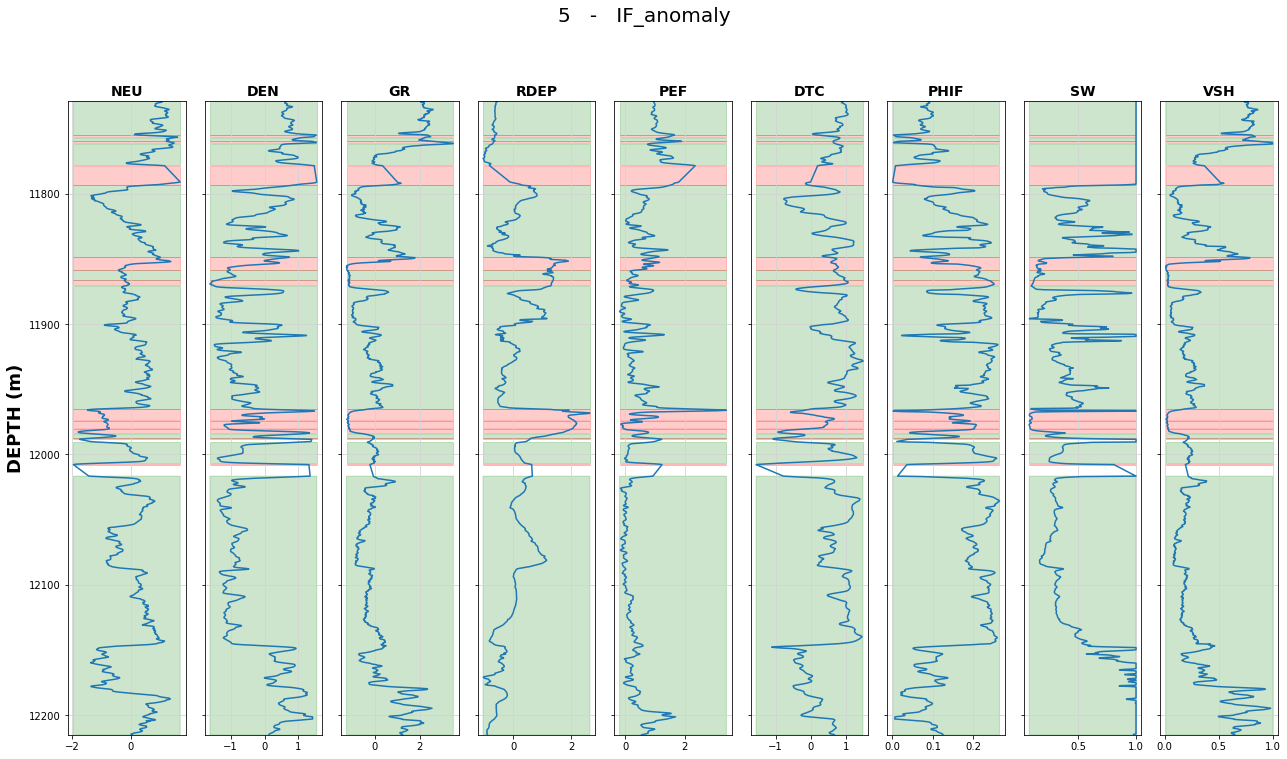

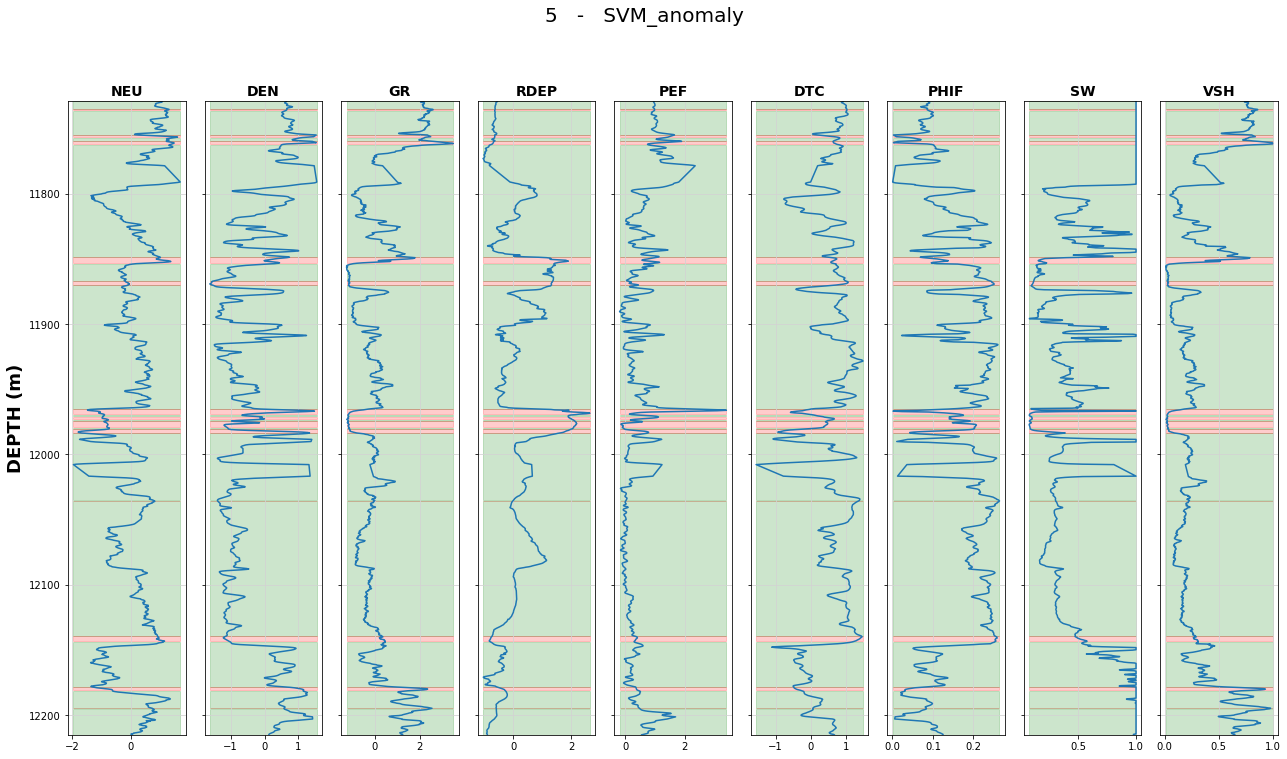

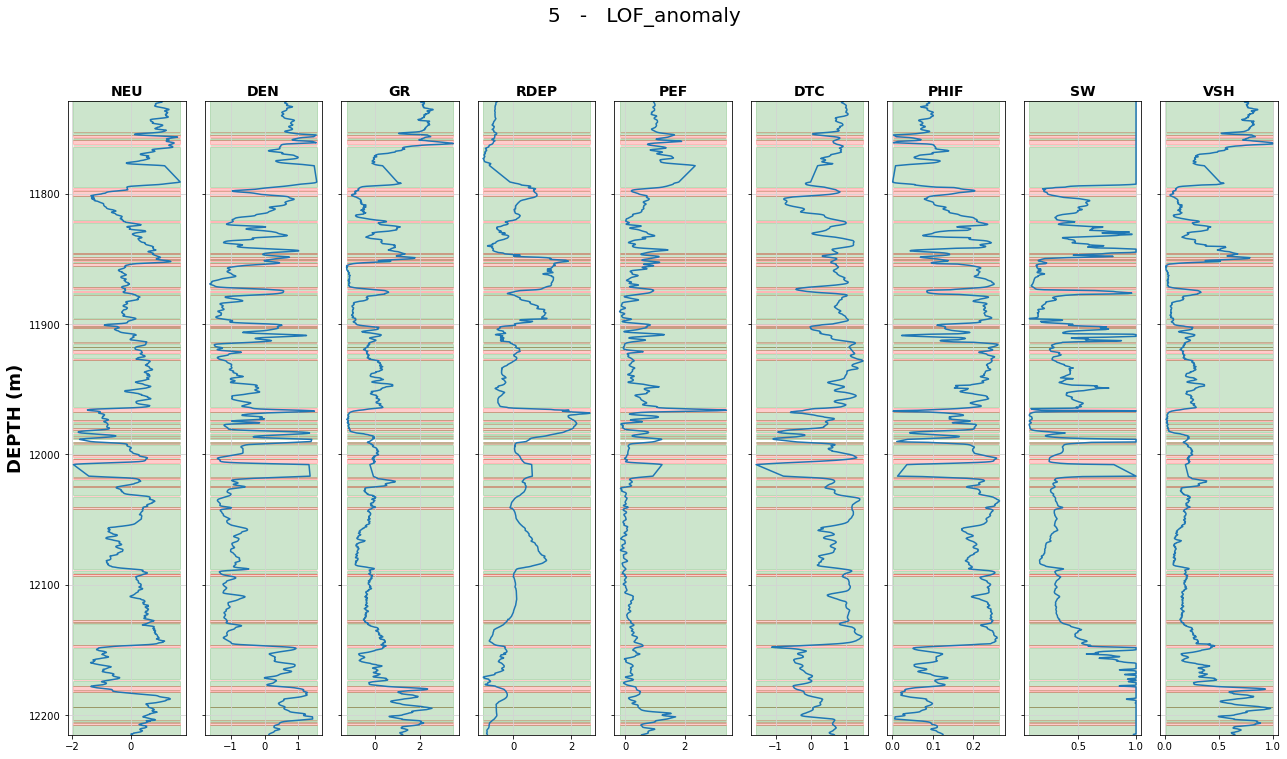

In [90]:
# Select the well by index
well = 2

# Call the function for each method:
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'IF_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'SVM_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPTH'], 'LOF_anomaly')